# Using pre-trained CNN

In this lab, we will see:

- Zero-shot performance of pre-trained backbone
- Use pre-trained CNN as backbone
- Fine-tuning the pre-trained CNN

In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

In [2]:
batch_size = 64
lr = 0.01
epochs = 15
device = torch.device("cuda") # to use the GPU

In [3]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
# create a split for train/validation. We can use early stop
trainset, valset = torch.utils.data.random_split(dataset, [40000, 10000])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          drop_last=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=False)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2,
                                          drop_last=False)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


c:\Users\sangi\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sangi\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/15
Accuracy of the network on the test images: 54.94%
Average Test Loss: 1.6201
Train Loss: 1.7101, Test Loss: 1.6201, Accuracy: 54.94%, Time: 23.77s
Epoch 2/15
Accuracy of the network on the test images: 52.85%
Average Test Loss: 1.6154
Train Loss: 1.1437, Test Loss: 1.6154, Accuracy: 52.85%, Time: 20.67s
Epoch 3/15
Accuracy of the network on the test images: 71.20%
Average Test Loss: 0.8941
Train Loss: 0.9334, Test Loss: 0.8941, Accuracy: 71.20%, Time: 22.12s
Epoch 4/15
Accuracy of the network on the test images: 72.47%
Average Test Loss: 0.8924
Train Loss: 0.7932, Test Loss: 0.8924, Accuracy: 72.47%, Time: 20.31s
Epoch 5/15
Accuracy of the network on the test images: 75.36%
Average Test Loss: 0.7152
Train Loss: 0.7246, Test Loss: 0.7152, Accuracy: 75.36%, Time: 21.01s
Epoch 6/15
Accuracy of the network on the test images: 76.39%
Average Test Loss: 0.6923
Train Loss: 0.6671, Test Loss: 0.6923, Accuracy: 76.39%, Time: 26.57s
Epoch 7/15
Accuracy of the network on the test image

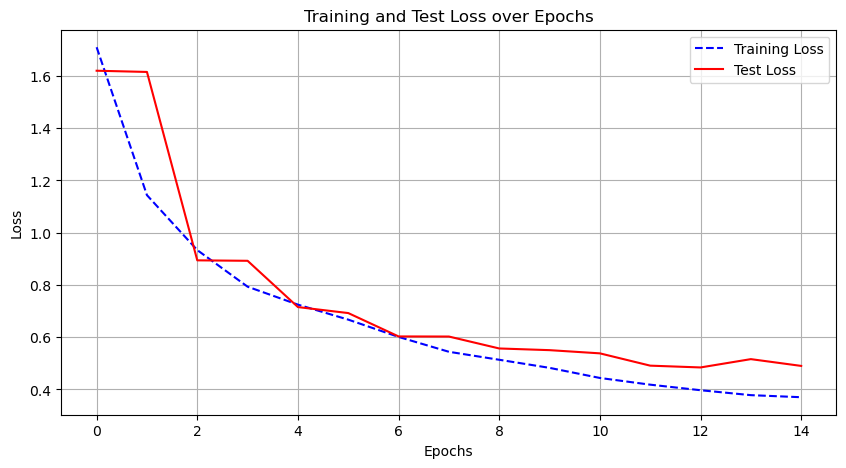

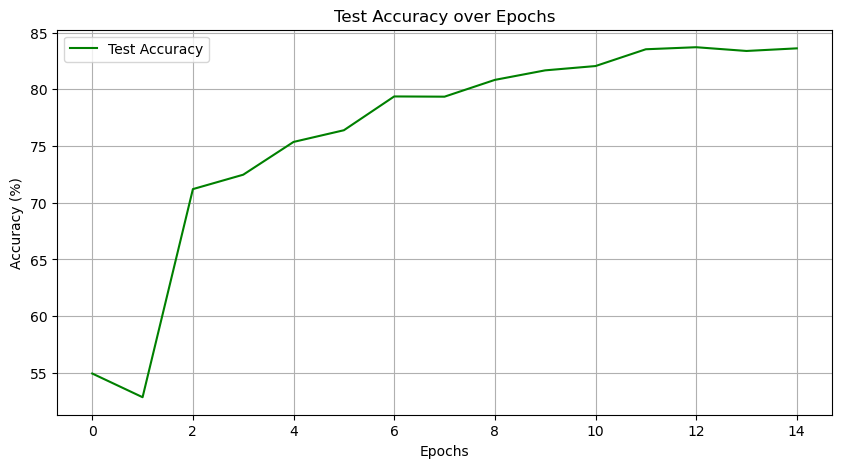

Plots saved as 'plot_assignment2\Resnet18 Pretrained_loss.png' and 'plot_assignment2\Resnet18 Pretrained_accuracy.png'.

Training Complete!
Total Training Time: 300.70 seconds
Minimum Training Loss: 0.3701
Minimum Test Loss: 0.4841
Highest Test Accuracy: 83.71%
Accuracy for class: plane is 85.8 %
Accuracy for class: car   is 92.5 %
Accuracy for class: bird  is 76.6 %
Accuracy for class: cat   is 67.4 %
Accuracy for class: deer  is 84.3 %
Accuracy for class: dog   is 75.0 %
Accuracy for class: frog  is 89.8 %
Accuracy for class: horse is 87.3 %
Accuracy for class: ship  is 91.5 %
Accuracy for class: truck is 88.6 %


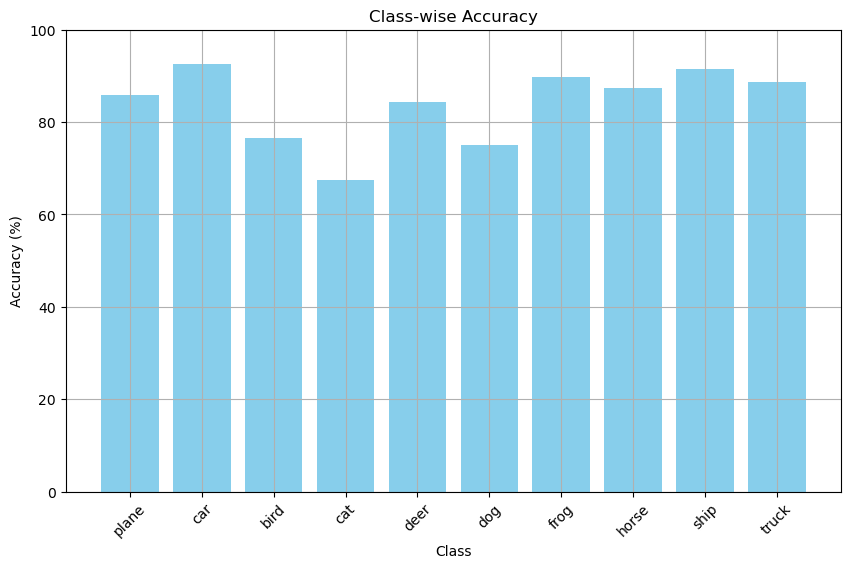

Accuracy for class: plane is 85.8 %
Accuracy for class: car   is 92.5 %
Accuracy for class: bird  is 76.6 %
Accuracy for class: cat   is 67.4 %
Accuracy for class: deer  is 84.3 %
Accuracy for class: dog   is 75.0 %
Accuracy for class: frog  is 89.8 %
Accuracy for class: horse is 87.3 %
Accuracy for class: ship  is 91.5 %
Accuracy for class: truck is 88.6 %


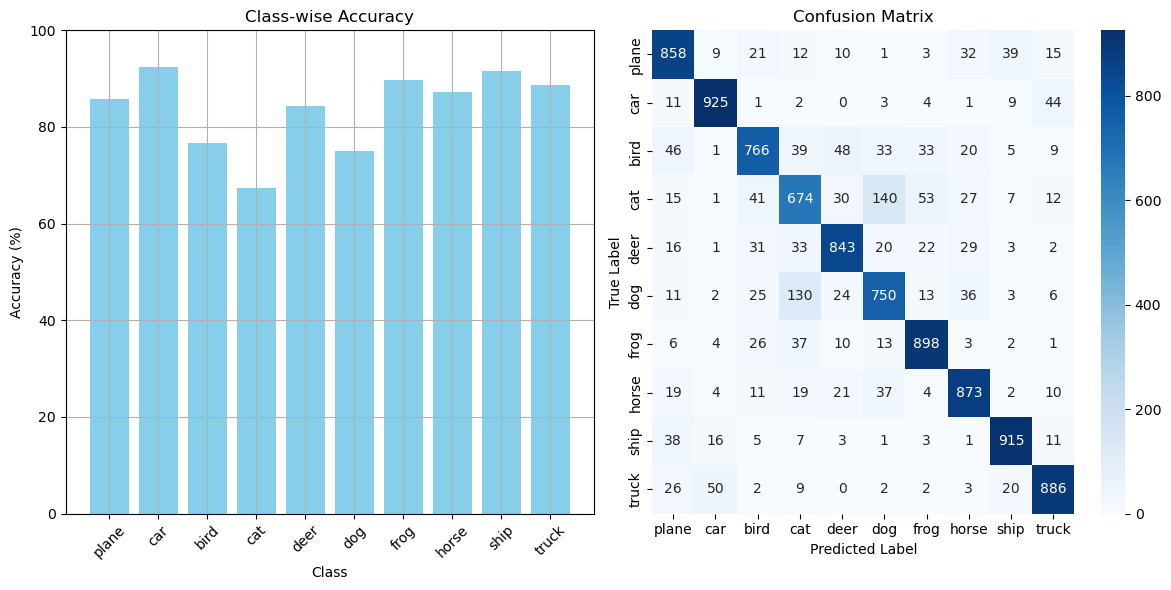

In [5]:
net = models.resnet18(pretrained=True)

for param in net.parameters():
    param.requires_grad = True
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
criterion = nn.CrossEntropyLoss()
net = net.to(device)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
plot_training(net, trainloader=trainloader, testloader=valloader, epochs=epochs, optimizer=optimizer, criterion=criterion, scheduler=scheduler, title='Resnet18 Pretrained')
plot_class_accuracy(net, testloader, classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes)

# Zero-Shot Resnet18

## Load a pre-defined network with pretrained weights



In [20]:
net = models.resnet18(pretrained=True)
# override the fc layer of the network since it is of 1000 classes by default (ImageNet)
net.fc = nn.Linear(512, 10)
net.to(device)

for param in net.parameters():
    param.requires_grad = False
net.fc.weight.requires_grad = True
net.fc.bias.requires_grad = True

c:\Users\sangi\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sangi\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
# count the trainable parameters of the model
def count_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def train(net, trainloader, optimizer, criterion, device):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(trainloader)
    return avg_train_loss


def test(net, testloader, criterion, device):
    net.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            # Calculate loss
            outputs = net(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate average test loss
    avg_test_loss = test_loss / len(testloader)
    accuracy = 100 * correct / total
    #print(f'Accuracy of the network on the test images: {accuracy:.2f}%')
    #print(f'Average Test Loss: {avg_test_loss:.4f}')
    return avg_test_loss, accuracy


import matplotlib.pyplot as plt
import torch

def class_accuracy(net, testloader, classes):
    accuracies = []
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # No gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)

            # Collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label.item() == prediction.item():  # Convert to Python integers for comparison
                    correct_pred[classes[label.item()]] += 1
                total_pred[classes[label.item()]] += 1

    # Print accuracy for each class
    for classname, correct_count in correct_pred.items():
        total_count = total_pred[classname]
        if total_count > 0:  # Avoid division by zero
            accuracy = 100 * float(correct_count) / total_count
        else:
            accuracy = 0.0  # No samples in this class
        accuracies.append(accuracy)
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

    return accuracies  # Return the accuracies list

def plot_class_accuracy(net, testloader, classes):
    accuracies = class_accuracy(net, testloader, classes)  # Pass classes argument
    plt.figure(figsize=(10, 6))
    plt.bar(classes, accuracies, color='skyblue')
    plt.xlabel('Class')
    plt.grid()
    plt.ylabel('Accuracy (%)')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 100)  # Set y-axis limits from 0 to 100 to represent percentage
    plt.xticks(rotation=45)
    plt.show()


import os
import time
import matplotlib.pyplot as plt

device = 'cuda'

def plot_training(net, trainloader, testloader, epochs, optimizer, criterion, scheduler, title):
    running_train_loss = []
    running_test_loss = []
    running_accuracy = []
    execution_time = 0

    # Loop through each epoch
    for e in range(epochs):
        start = time.time()
        
        # Print current epoch number
        print(f"Epoch {e + 1}/{epochs}")
        
        # Training and testing for the current epoch
        train_loss = train(net=net, trainloader=trainloader, optimizer=optimizer, criterion=criterion, device=device)
        test_loss, accuracy = test(net=net, testloader=testloader, criterion=criterion, device=device)
        
        # Update lists for plotting
        running_train_loss.append(train_loss)
        running_test_loss.append(test_loss)
        running_accuracy.append(accuracy)
        
        # Step the scheduler at the end of each epoch
        if scheduler is not None:
            scheduler.step()

        end = time.time()
        epoch_time = end - start
        execution_time += epoch_time
        
        # Print metrics for the current epoch
        print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%, Time: {epoch_time:.2f}s")

    # Create directory if it doesn't exist
    save_dir = 'plot_assignment2'
    os.makedirs(save_dir, exist_ok=True)

    # Plot Training and Test Loss
    plt.figure(figsize=(10, 5))
    plt.plot(running_train_loss, label='Training Loss', color='blue', linestyle='--')
    plt.plot(running_test_loss, label='Test Loss', color='red')
    plt.title("Training and Test Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    
    # Save the loss plot with the specified title
    loss_filename = os.path.join(save_dir, f"{title}_loss.png")
    plt.savefig(loss_filename)
    
    # Show the loss plot
    plt.show()  # Display the plot interactively
    plt.close()  # Close the figure to free up memory

    # Plot Test Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(running_accuracy, label='Test Accuracy', color='green')
    plt.title("Test Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid()
    
    # Save the accuracy plot with the specified title
    accuracy_filename = os.path.join(save_dir, f"{title}_accuracy.png")
    plt.savefig(accuracy_filename)

    # Show the accuracy plot
    plt.show()  # Display the plot interactively
    plt.close()  # Close the figure to free up memory

    print(f"Plots saved as '{loss_filename}' and '{accuracy_filename}'.")

    # Final summary
    print("\nTraining Complete!")
    print(f"Total Training Time: {execution_time:.2f} seconds")
    print(f"Minimum Training Loss: {min(running_train_loss):.4f}")
    print(f"Minimum Test Loss: {min(running_test_loss):.4f}")
    print(f"Highest Test Accuracy: {max(running_accuracy):.2f}%")
    
    return running_train_loss, running_test_loss, running_accuracy, execution_time


def plot_class_accuracy_with_confusion_matrix(net, testloader, classes, device):
    # Get class-wise accuracy
    accuracies = class_accuracy(net, testloader, classes)
    
    # Initialize empty lists for predictions and true labels for confusion matrix
    all_preds = []
    all_labels = []

    # Accumulate predictions and labels for the entire dataset
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            
            # Append predictions and labels to lists
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot class-wise accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(classes, accuracies, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Accuracy (%)')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.grid()

    # Plot confusion matrix as a heatmap
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

def train(net, trainloader, optimizer, criterion, device):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = running_loss / len(trainloader)
    return avg_train_loss


def test(net, testloader, criterion, device):
    net.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            # Calculate loss
            outputs = net(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate average test loss
    avg_test_loss = test_loss / len(testloader)
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f}%')
    print(f'Average Test Loss: {avg_test_loss:.4f}')
    return avg_test_loss, accuracy


import matplotlib.pyplot as plt
import torch

def class_accuracy(net, testloader, classes):
    accuracies = []
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # No gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)

            # Collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label.item() == prediction.item():  # Convert to Python integers for comparison
                    correct_pred[classes[label.item()]] += 1
                total_pred[classes[label.item()]] += 1

    # Print accuracy for each class
    for classname, correct_count in correct_pred.items():
        total_count = total_pred[classname]
        if total_count > 0:  # Avoid division by zero
            accuracy = 100 * float(correct_count) / total_count
        else:
            accuracy = 0.0  # No samples in this class
        accuracies.append(accuracy)
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

    return accuracies  # Return the accuracies list

def plot_class_accuracy(net, testloader, classes):
    accuracies = class_accuracy(net, testloader, classes)  # Pass classes argument
    plt.figure(figsize=(10, 6))
    plt.bar(classes, accuracies, color='skyblue')
    plt.xlabel('Class')
    plt.grid()
    plt.ylabel('Accuracy (%)')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 100)  # Set y-axis limits from 0 to 100 to represent percentage
    plt.xticks(rotation=45)
    plt.show()

import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_class_accuracy_with_confusion_matrix(net, testloader, classes):
    # Get class-wise accuracy
    accuracies = class_accuracy(net, testloader, classes)
    
    # Initialize empty lists for predictions and true labels for confusion matrix
    all_preds = []
    all_labels = []

    # Accumulate predictions and labels for the entire dataset
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            
            # Append predictions and labels to lists
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot class-wise accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(classes, accuracies, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Accuracy (%)')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.grid()

    # Plot confusion matrix as a heatmap
    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()


In [22]:
# frozen all the weights of the network, except for fc ones
for param in net.parameters():
    param.requires_grad = False
net.fc.weight.requires_grad = True
net.fc.bias.requires_grad = True
count_trainable_parameters(net)

5130

# Zero-Shot

Accuracy for class: plane is 0.3 %
Accuracy for class: car   is 0.8 %
Accuracy for class: bird  is 6.0 %
Accuracy for class: cat   is 3.1 %
Accuracy for class: deer  is 1.7 %
Accuracy for class: dog   is 30.9 %
Accuracy for class: frog  is 10.7 %
Accuracy for class: horse is 16.2 %
Accuracy for class: ship  is 11.2 %
Accuracy for class: truck is 16.1 %


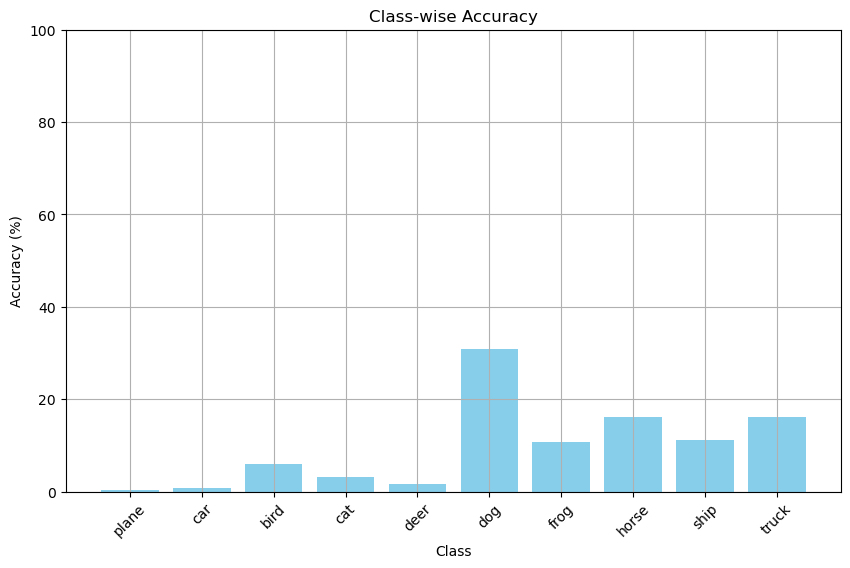

In [23]:
model = models.resnet18(weights='IMAGENET1K_V1')
model.fc = nn.Linear(512, 10)
model = model.to(device)
plot_class_accuracy(model, testloader, classes)

# Fine tuning only last layer

Epoch 1/15
Accuracy of the network on the test images: 30.22%
Average Test Loss: 4.3220
Train Loss: 4.5521, Test Loss: 4.3220, Accuracy: 30.22%, Time: 19.66s
Epoch 2/15
Accuracy of the network on the test images: 29.03%
Average Test Loss: 3.6218
Train Loss: 4.0908, Test Loss: 3.6218, Accuracy: 29.03%, Time: 19.31s
Epoch 3/15
Accuracy of the network on the test images: 26.66%
Average Test Loss: 4.0860
Train Loss: 3.8144, Test Loss: 4.0860, Accuracy: 26.66%, Time: 18.76s
Epoch 4/15
Accuracy of the network on the test images: 29.51%
Average Test Loss: 4.1963
Train Loss: 3.5706, Test Loss: 4.1963, Accuracy: 29.51%, Time: 19.83s
Epoch 5/15
Accuracy of the network on the test images: 33.34%
Average Test Loss: 2.7112
Train Loss: 3.3041, Test Loss: 2.7112, Accuracy: 33.34%, Time: 19.33s
Epoch 6/15
Accuracy of the network on the test images: 33.98%
Average Test Loss: 2.7602
Train Loss: 2.9433, Test Loss: 2.7602, Accuracy: 33.98%, Time: 17.89s
Epoch 7/15
Accuracy of the network on the test image

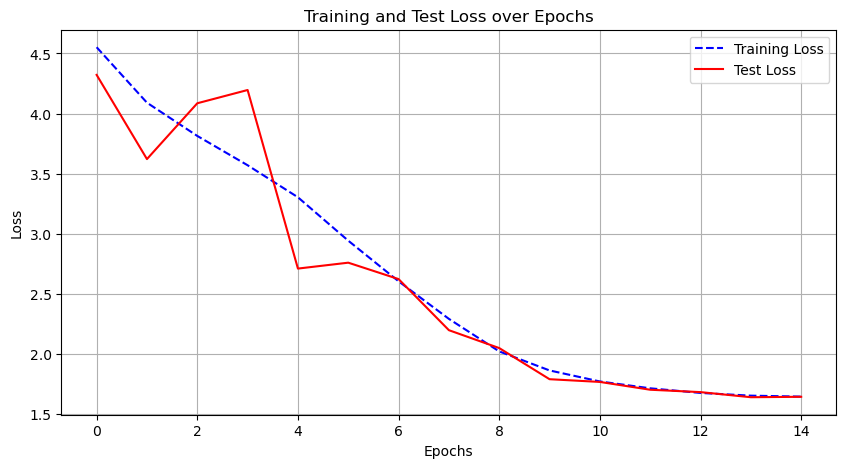

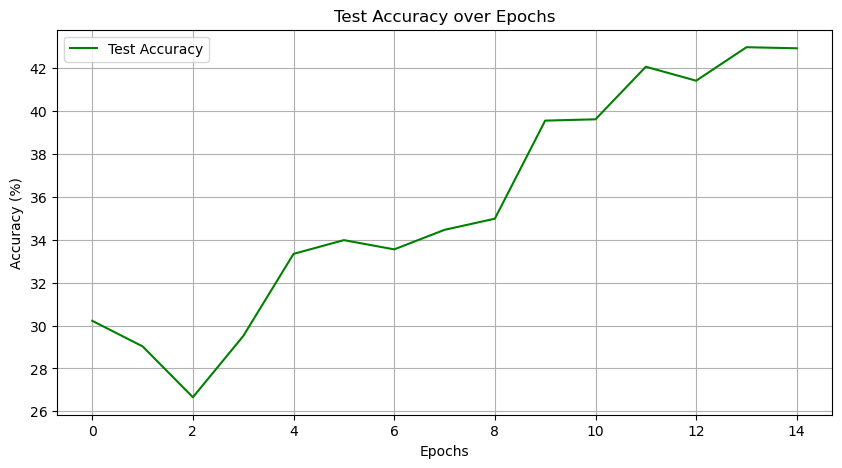

Plots saved as 'plot_assignment2\ResNet-18 Fine Tune FC_loss.png' and 'plot_assignment2\ResNet-18 Fine Tune FC_accuracy.png'.

Training Complete!
Total Training Time: 271.09 seconds
Minimum Training Loss: 1.6464
Minimum Test Loss: 1.6414
Highest Test Accuracy: 42.97%
Accuracy for class: plane is 52.9 %
Accuracy for class: car   is 41.9 %
Accuracy for class: bird  is 32.4 %
Accuracy for class: cat   is 29.3 %
Accuracy for class: deer  is 48.4 %
Accuracy for class: dog   is 39.4 %
Accuracy for class: frog  is 57.3 %
Accuracy for class: horse is 37.9 %
Accuracy for class: ship  is 42.6 %
Accuracy for class: truck is 34.7 %


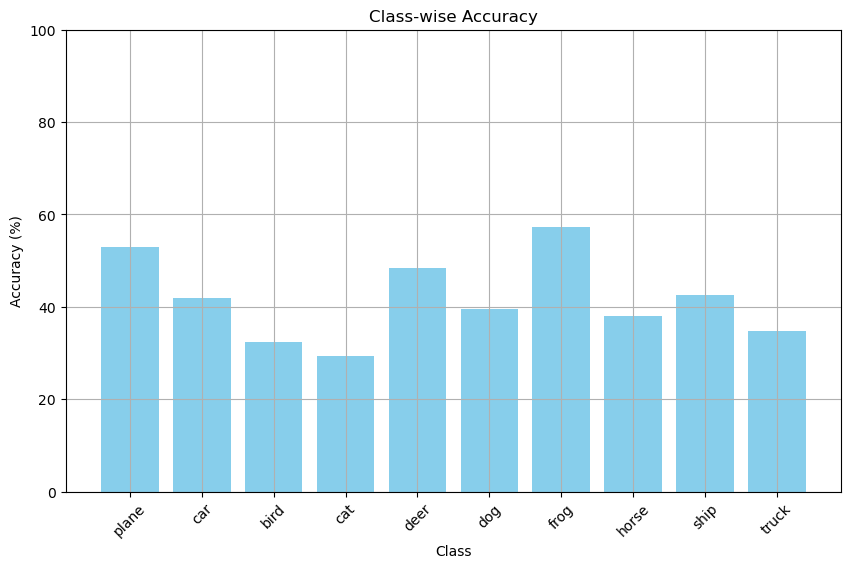

Accuracy for class: plane is 52.9 %
Accuracy for class: car   is 41.9 %
Accuracy for class: bird  is 32.4 %
Accuracy for class: cat   is 29.3 %
Accuracy for class: deer  is 48.4 %
Accuracy for class: dog   is 39.4 %
Accuracy for class: frog  is 57.3 %
Accuracy for class: horse is 37.9 %
Accuracy for class: ship  is 42.6 %
Accuracy for class: truck is 34.7 %


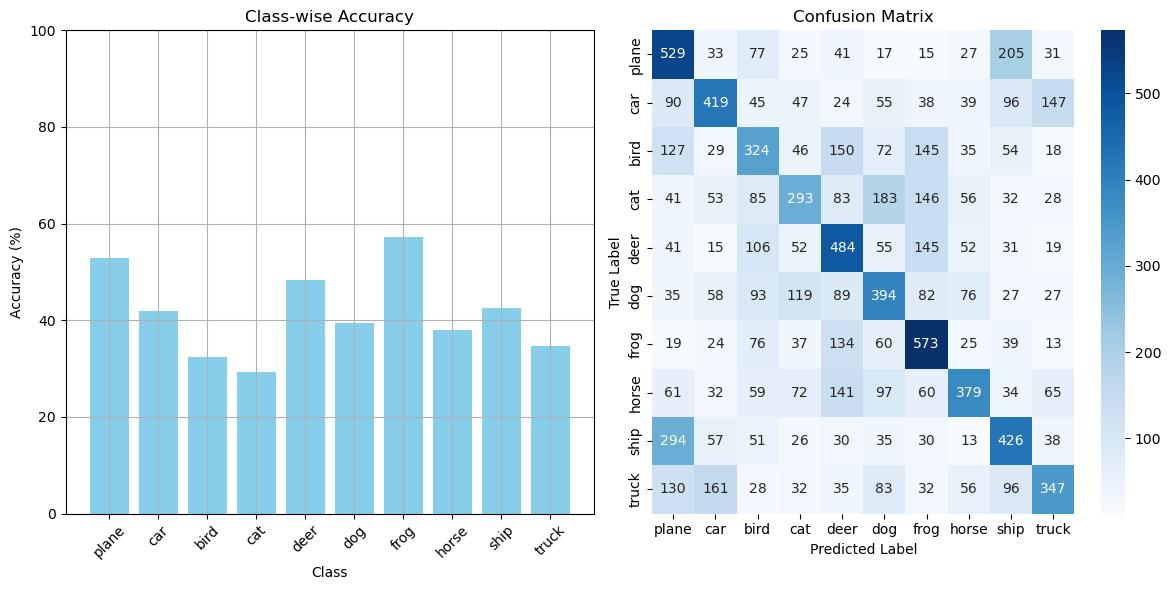

In [5]:
import torch
import torch.nn as nn
from torchvision import models

# Load the pretrained ResNet-18 model
net = models.resnet18(weights='IMAGENET1K_V1')  # Use the updated way to load pretrained weights
net.fc = nn.Linear(net.fc.in_features, 10)  # 10 classes for your specific task
net.to(device)

# Freeze all parameters except the last layer
for param in net.parameters():
    param.requires_grad = False

# Enable gradient computation only for the new fc layer
for param in net.fc.parameters():
    param.requires_grad = True

# Set up the optimizer
optimizer = torch.optim.SGD(net.fc.parameters(), lr=0.1, weight_decay=1e-4)  # Only optimize the new fc layer
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Title for plotting purposes
title = 'ResNet-18 Fine Tune FC'

# Function call to plot training results
plot_training(net, trainloader=trainloader, testloader=valloader, epochs=epochs, optimizer=optimizer, criterion=criterion, scheduler=scheduler, title=title)
plot_class_accuracy(net, testloader, classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes)

# VARIATION - Fine tune FC with sequential with droput

Epoch 1/15
Accuracy of the network on the test images: 35.29%
Average Test Loss: 1.8615
Train Loss: 2.0862, Test Loss: 1.8615, Accuracy: 35.29%, Time: 17.34s
Epoch 2/15
Accuracy of the network on the test images: 37.70%
Average Test Loss: 1.7697
Train Loss: 1.8736, Test Loss: 1.7697, Accuracy: 37.70%, Time: 17.16s
Epoch 3/15
Accuracy of the network on the test images: 39.68%
Average Test Loss: 1.7345
Train Loss: 1.8266, Test Loss: 1.7345, Accuracy: 39.68%, Time: 17.16s
Epoch 4/15
Accuracy of the network on the test images: 39.56%
Average Test Loss: 1.7191
Train Loss: 1.7820, Test Loss: 1.7191, Accuracy: 39.56%, Time: 17.06s
Epoch 5/15
Accuracy of the network on the test images: 40.77%
Average Test Loss: 1.7043
Train Loss: 1.7706, Test Loss: 1.7043, Accuracy: 40.77%, Time: 17.64s
Epoch 6/15
Accuracy of the network on the test images: 40.73%
Average Test Loss: 1.6939
Train Loss: 1.7527, Test Loss: 1.6939, Accuracy: 40.73%, Time: 17.59s
Epoch 7/15
Accuracy of the network on the test image

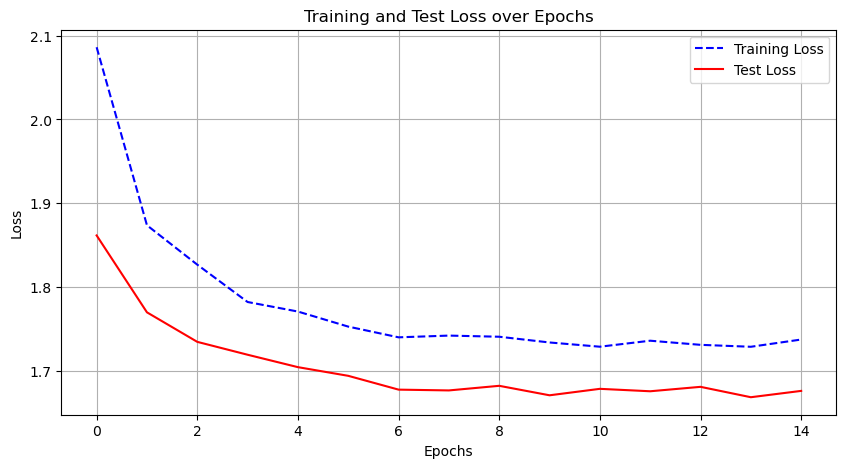

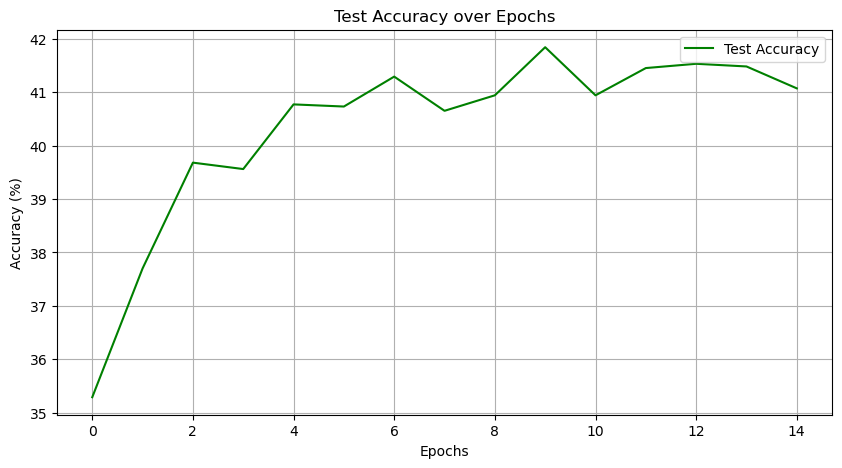

Plots saved as 'plot_assignment2\ResNet-18 Fine Tune FC_loss.png' and 'plot_assignment2\ResNet-18 Fine Tune FC_accuracy.png'.

Training Complete!
Total Training Time: 263.92 seconds
Minimum Training Loss: 1.7286
Minimum Test Loss: 1.6684
Highest Test Accuracy: 41.84%
Accuracy for class: plane is 55.2 %
Accuracy for class: car   is 49.1 %
Accuracy for class: bird  is 32.6 %
Accuracy for class: cat   is 32.7 %
Accuracy for class: deer  is 48.8 %
Accuracy for class: dog   is 37.1 %
Accuracy for class: frog  is 53.9 %
Accuracy for class: horse is 31.9 %
Accuracy for class: ship  is 37.9 %
Accuracy for class: truck is 28.4 %


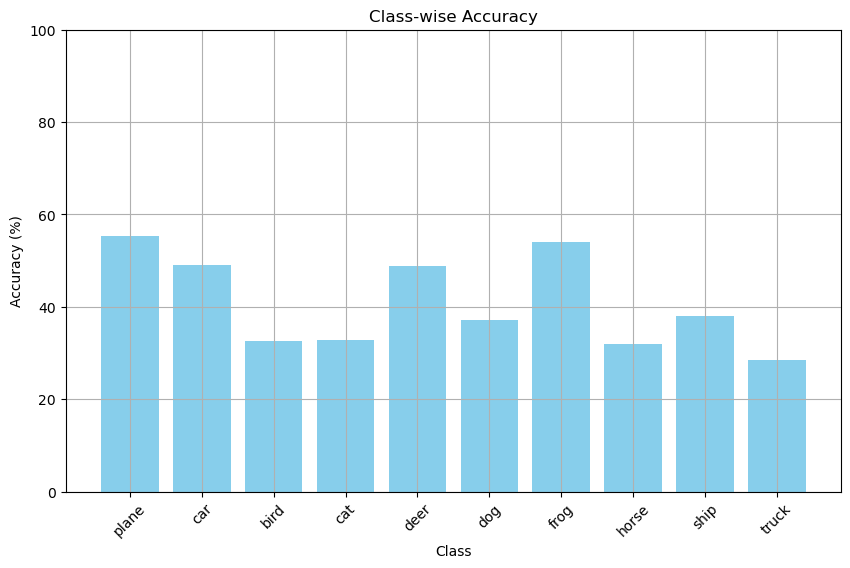

Accuracy for class: plane is 55.2 %
Accuracy for class: car   is 49.1 %
Accuracy for class: bird  is 32.6 %
Accuracy for class: cat   is 32.7 %
Accuracy for class: deer  is 48.8 %
Accuracy for class: dog   is 37.1 %
Accuracy for class: frog  is 53.9 %
Accuracy for class: horse is 31.9 %
Accuracy for class: ship  is 37.9 %
Accuracy for class: truck is 28.4 %


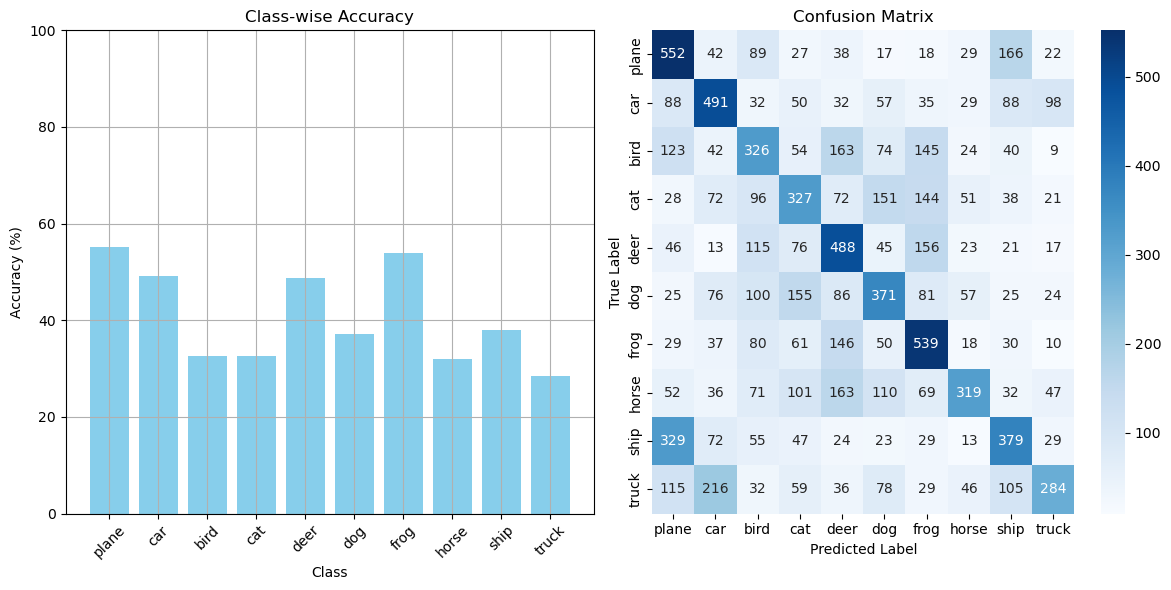

In [6]:

net = models.resnet18(weights='IMAGENET1K_V1')  # Use the updated way to load pretrained weights
net.fc = nn.Sequential(
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 10)
)
net.to(device)

# Freeze all parameters except the last layer
for param in net.parameters():
    param.requires_grad = False

# Enable gradient computation only for the new fc layer
for param in net.fc.parameters():
    param.requires_grad = True

# Set up the optimizer
optimizer = torch.optim.SGD(net.fc.parameters(), lr=0.01, weight_decay=1e-4)  # Only optimize the new fc layer
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Title for plotting purposes
title = 'ResNet-18 Fine Tune FC'

# Function call to plot training results
plot_training(net, trainloader=trainloader, testloader=valloader, epochs=epochs, optimizer=optimizer, criterion=criterion, scheduler=scheduler, title=title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes)

## Add additional layer to the pre-trained model


Epoch 1/15
Accuracy of the network on the test images: 71.08%
Average Test Loss: 0.8577
Train Loss: 1.3288, Test Loss: 0.8577, Accuracy: 71.08%, Time: 22.14s
Epoch 2/15
Accuracy of the network on the test images: 75.16%
Average Test Loss: 0.7210
Train Loss: 0.8699, Test Loss: 0.7210, Accuracy: 75.16%, Time: 21.57s
Epoch 3/15
Accuracy of the network on the test images: 77.84%
Average Test Loss: 0.6442
Train Loss: 0.7465, Test Loss: 0.6442, Accuracy: 77.84%, Time: 21.79s
Epoch 4/15
Accuracy of the network on the test images: 78.82%
Average Test Loss: 0.6182
Train Loss: 0.6696, Test Loss: 0.6182, Accuracy: 78.82%, Time: 21.72s
Epoch 5/15
Accuracy of the network on the test images: 79.67%
Average Test Loss: 0.5858
Train Loss: 0.6081, Test Loss: 0.5858, Accuracy: 79.67%, Time: 21.87s
Epoch 6/15
Accuracy of the network on the test images: 80.65%
Average Test Loss: 0.5624
Train Loss: 0.5652, Test Loss: 0.5624, Accuracy: 80.65%, Time: 21.73s
Epoch 7/15
Accuracy of the network on the test image

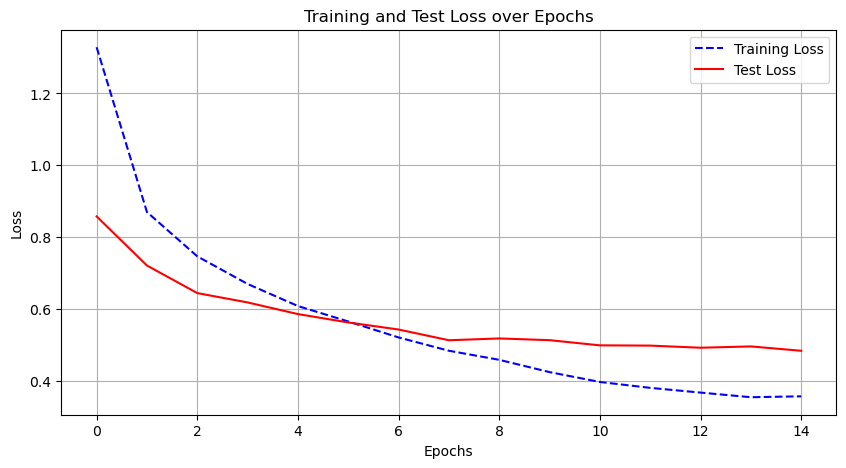

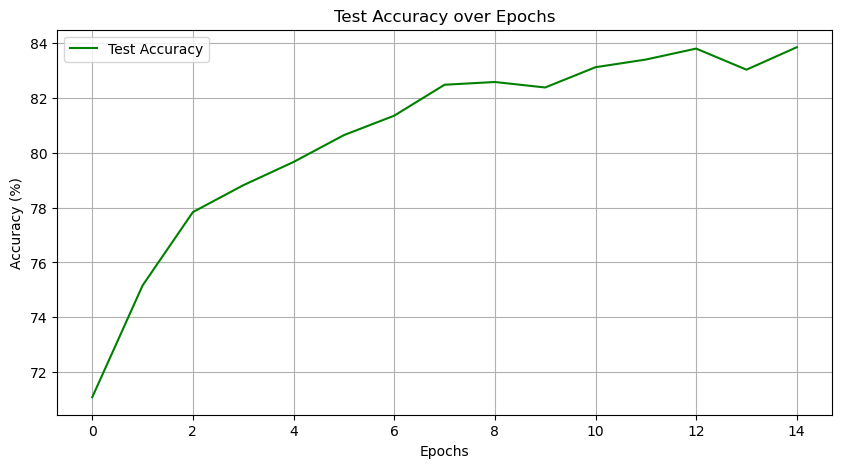

Plots saved as 'plot_assignment2\Resnet18 Fine Tune FC_loss.png' and 'plot_assignment2\Resnet18 Fine Tune FC_accuracy.png'.

Training Complete!
Total Training Time: 328.05 seconds
Minimum Training Loss: 0.3543
Minimum Test Loss: 0.4836
Highest Test Accuracy: 83.86%
Accuracy for class: plane is 88.4 %
Accuracy for class: car   is 92.7 %
Accuracy for class: bird  is 79.9 %
Accuracy for class: cat   is 66.6 %
Accuracy for class: deer  is 82.3 %
Accuracy for class: dog   is 74.7 %
Accuracy for class: frog  is 89.2 %
Accuracy for class: horse is 87.8 %
Accuracy for class: ship  is 90.8 %
Accuracy for class: truck is 90.5 %


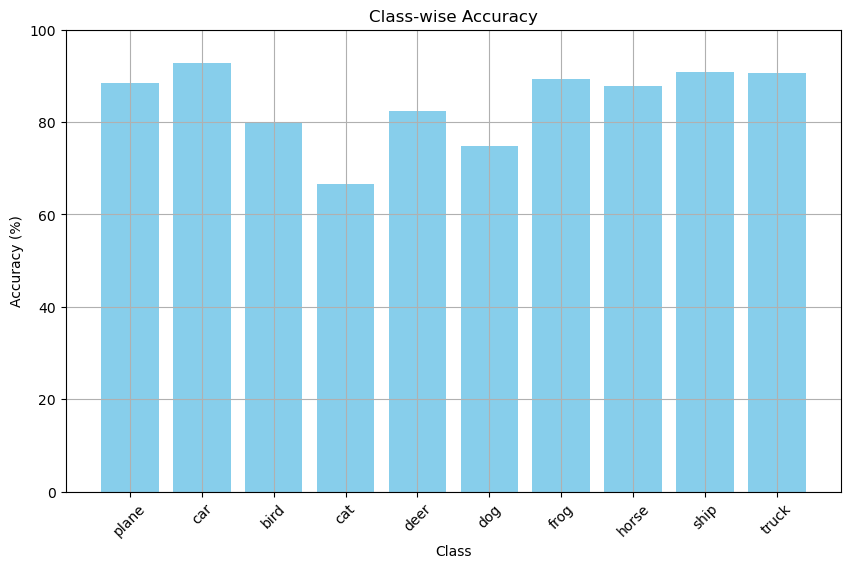

Accuracy for class: plane is 88.4 %
Accuracy for class: car   is 92.7 %
Accuracy for class: bird  is 79.9 %
Accuracy for class: cat   is 66.6 %
Accuracy for class: deer  is 82.3 %
Accuracy for class: dog   is 74.7 %
Accuracy for class: frog  is 89.2 %
Accuracy for class: horse is 87.8 %
Accuracy for class: ship  is 90.8 %
Accuracy for class: truck is 90.5 %


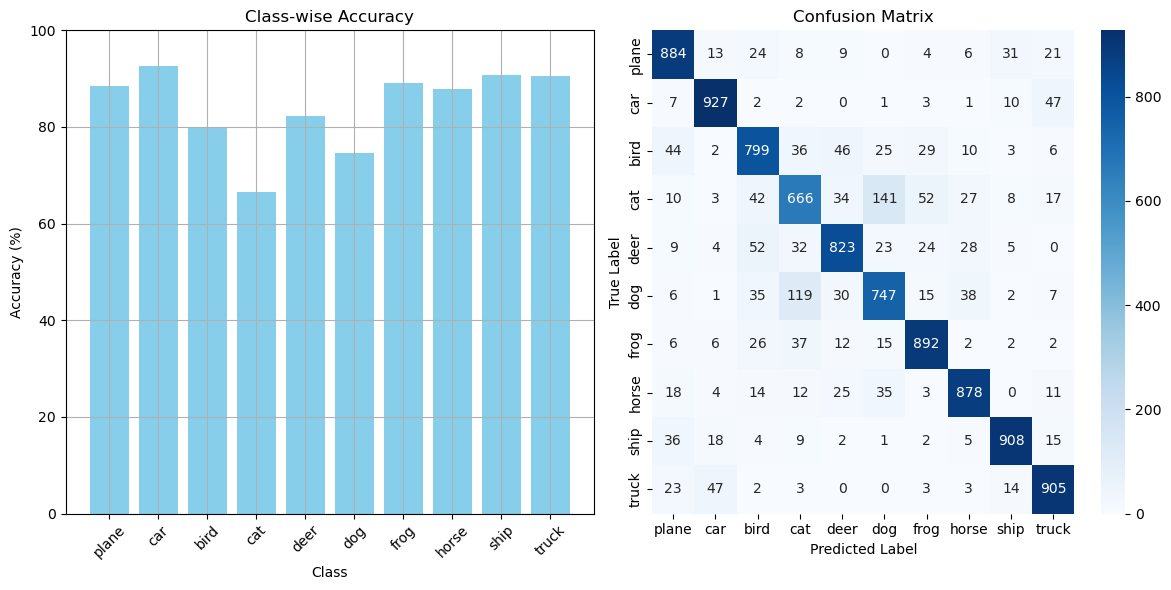

In [7]:
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    nn.Dropout(0.5),
    net.fc
)
net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net, testloader, classes)

## Fine-tuning some part of the CNN (not only the classifier)

Epoch 1/15
Accuracy of the network on the test images: 45.55%
Average Test Loss: 1.5285
Train Loss: 1.8834, Test Loss: 1.5285, Accuracy: 45.55%, Time: 21.58s
Epoch 2/15
Accuracy of the network on the test images: 49.56%
Average Test Loss: 1.4013
Train Loss: 1.6141, Test Loss: 1.4013, Accuracy: 49.56%, Time: 21.25s
Epoch 3/15
Accuracy of the network on the test images: 55.22%
Average Test Loss: 1.2764
Train Loss: 1.4952, Test Loss: 1.2764, Accuracy: 55.22%, Time: 21.49s
Epoch 4/15
Accuracy of the network on the test images: 56.76%
Average Test Loss: 1.2980
Train Loss: 1.4200, Test Loss: 1.2980, Accuracy: 56.76%, Time: 21.69s
Epoch 5/15
Accuracy of the network on the test images: 58.96%
Average Test Loss: 1.1941
Train Loss: 1.3556, Test Loss: 1.1941, Accuracy: 58.96%, Time: 21.51s
Epoch 6/15
Accuracy of the network on the test images: 58.90%
Average Test Loss: 1.1957
Train Loss: 1.3146, Test Loss: 1.1957, Accuracy: 58.90%, Time: 21.54s
Epoch 7/15
Accuracy of the network on the test image

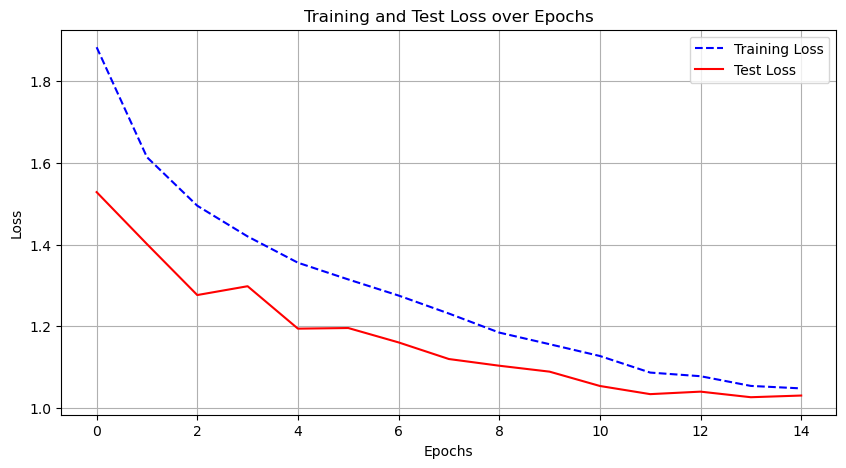

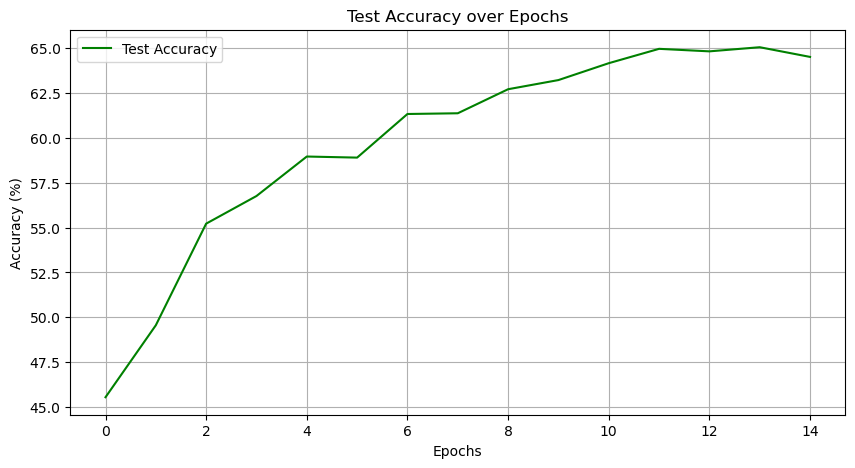

Plots saved as 'plot_assignment2\Resnet18 Fine Tune FC&L4 with different optimizers_loss.png' and 'plot_assignment2\Resnet18 Fine Tune FC&L4 with different optimizers_accuracy.png'.

Training Complete!
Total Training Time: 323.38 seconds
Minimum Training Loss: 1.0478
Minimum Test Loss: 1.0262
Highest Test Accuracy: 65.05%
Accuracy for class: plane is 69.7 %
Accuracy for class: car   is 76.5 %
Accuracy for class: bird  is 57.7 %
Accuracy for class: cat   is 53.2 %
Accuracy for class: deer  is 62.6 %
Accuracy for class: dog   is 61.8 %
Accuracy for class: frog  is 73.6 %
Accuracy for class: horse is 67.8 %
Accuracy for class: ship  is 72.0 %
Accuracy for class: truck is 67.7 %


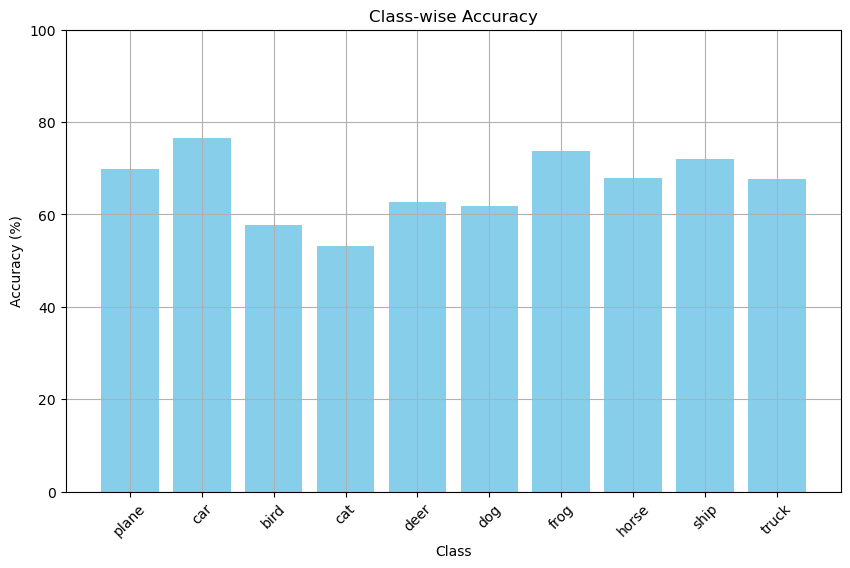

Accuracy for class: plane is 69.7 %
Accuracy for class: car   is 76.5 %
Accuracy for class: bird  is 57.7 %
Accuracy for class: cat   is 53.2 %
Accuracy for class: deer  is 62.6 %
Accuracy for class: dog   is 61.8 %
Accuracy for class: frog  is 73.6 %
Accuracy for class: horse is 67.8 %
Accuracy for class: ship  is 72.0 %
Accuracy for class: truck is 67.7 %


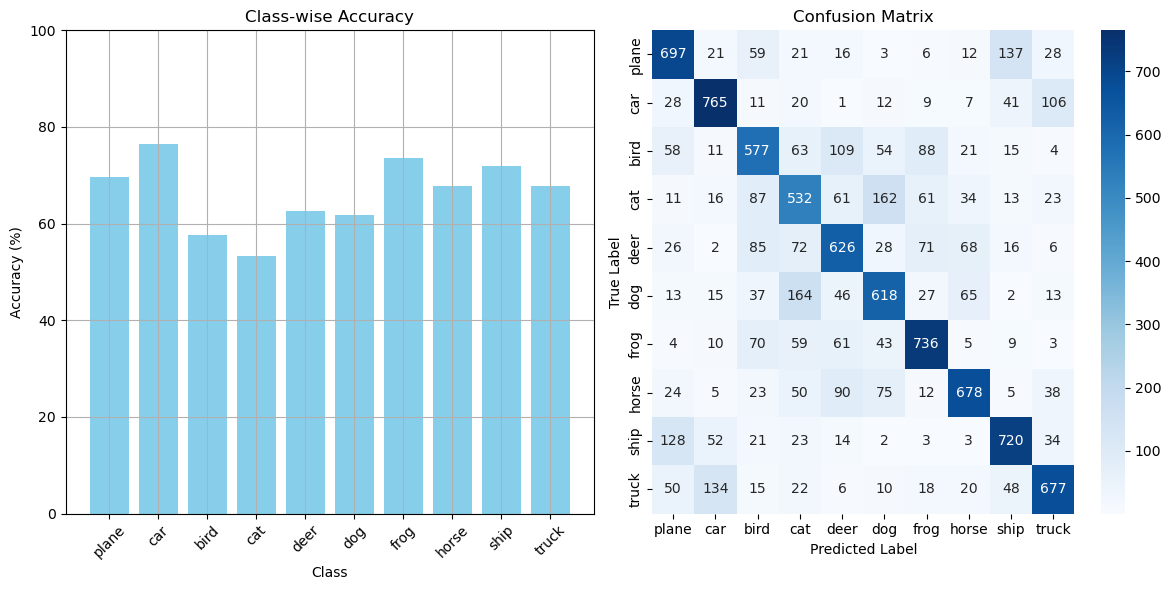

In [8]:
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    nn.Dropout(0.5),
    net.fc
)
net.to(device)
# Unfreeze layer4 parameters
for param in net.layer4.parameters():
    param.requires_grad = True

# Unfreeze fc layer parameters
net.fc.requires_grad = True

# Setting different learning rates
layer4_params = {'params': net.layer4.parameters(), 'lr': 0.0001}
fc_params = {'params': net.fc.parameters(), 'lr': 0.01}

# Assuming you are using an Adam optimizer
optimizer = torch.optim.Adam([layer4_params, fc_params], weight_decay=1e-04)


net.to(device)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC&L4 with different optimizers'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net,testloader,classes)

Epoch 1/15
Accuracy of the network on the test images: 41.44%
Average Test Loss: 1.6450
Train Loss: 1.7721, Test Loss: 1.6450, Accuracy: 41.44%, Time: 20.34s
Epoch 2/15
Accuracy of the network on the test images: 45.23%
Average Test Loss: 1.5351
Train Loss: 1.5710, Test Loss: 1.5351, Accuracy: 45.23%, Time: 20.36s
Epoch 3/15
Accuracy of the network on the test images: 49.07%
Average Test Loss: 1.4445
Train Loss: 1.4816, Test Loss: 1.4445, Accuracy: 49.07%, Time: 20.24s
Epoch 4/15
Accuracy of the network on the test images: 51.68%
Average Test Loss: 1.3746
Train Loss: 1.4048, Test Loss: 1.3746, Accuracy: 51.68%, Time: 20.35s
Epoch 5/15
Accuracy of the network on the test images: 53.86%
Average Test Loss: 1.3027
Train Loss: 1.3389, Test Loss: 1.3027, Accuracy: 53.86%, Time: 20.38s
Epoch 6/15
Accuracy of the network on the test images: 54.00%
Average Test Loss: 1.2791
Train Loss: 1.3013, Test Loss: 1.2791, Accuracy: 54.00%, Time: 20.41s
Epoch 7/15
Accuracy of the network on the test image

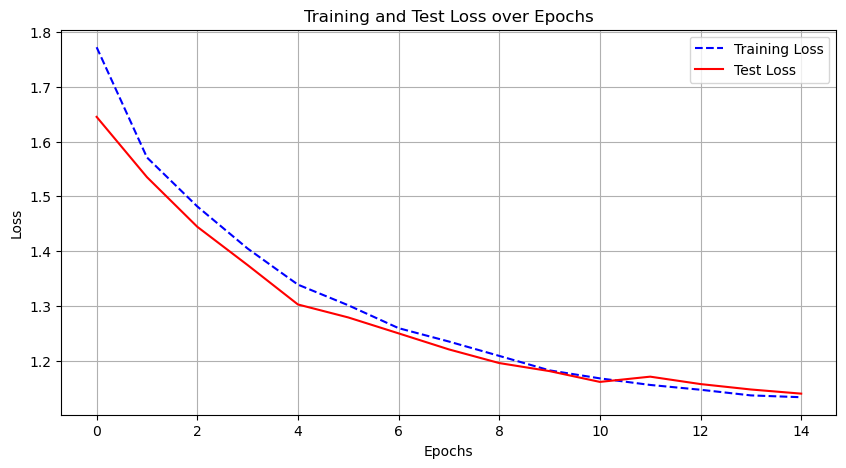

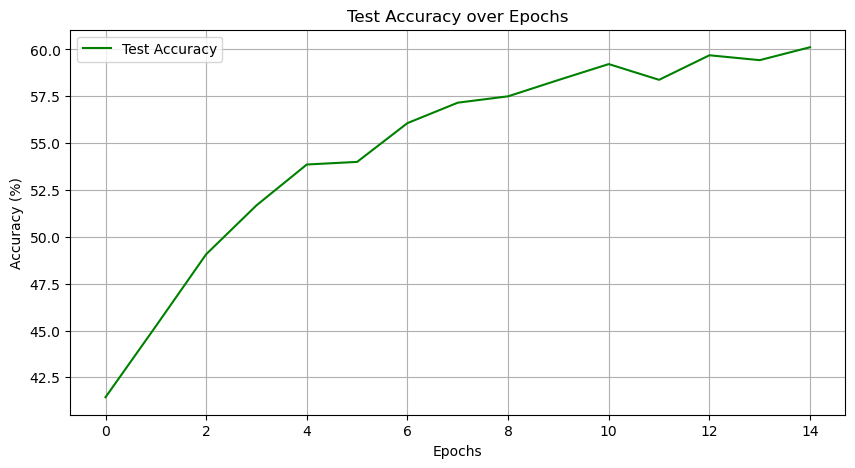

Plots saved as 'plot_assignment2\Resnet18 Fine Tune FC&L2 with different optimizers_loss.png' and 'plot_assignment2\Resnet18 Fine Tune FC&L2 with different optimizers_accuracy.png'.

Training Complete!
Total Training Time: 305.86 seconds
Minimum Training Loss: 1.1335
Minimum Test Loss: 1.1400
Highest Test Accuracy: 60.12%
Accuracy for class: plane is 65.9 %
Accuracy for class: car   is 75.8 %
Accuracy for class: bird  is 47.7 %
Accuracy for class: cat   is 44.7 %
Accuracy for class: deer  is 50.1 %
Accuracy for class: dog   is 60.5 %
Accuracy for class: frog  is 71.5 %
Accuracy for class: horse is 64.5 %
Accuracy for class: ship  is 66.8 %
Accuracy for class: truck is 59.8 %


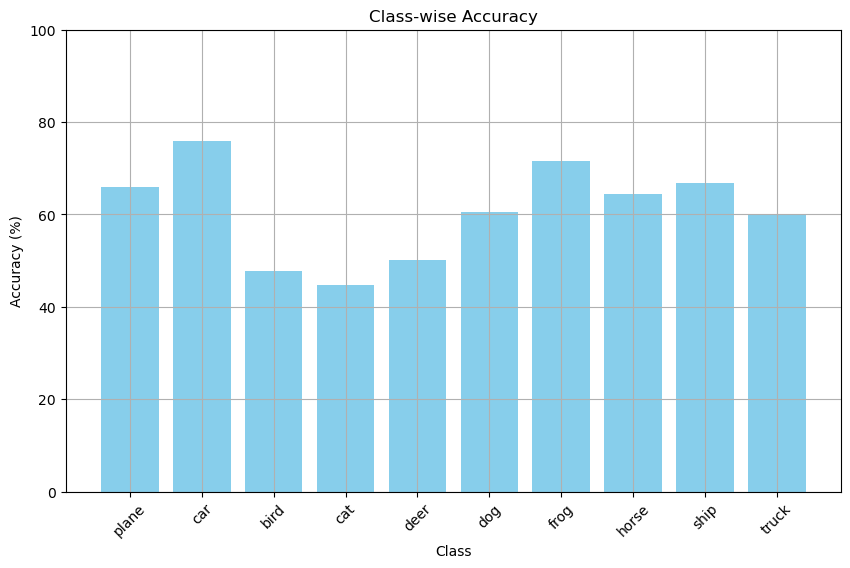

Accuracy for class: plane is 65.9 %
Accuracy for class: car   is 75.8 %
Accuracy for class: bird  is 47.7 %
Accuracy for class: cat   is 44.7 %
Accuracy for class: deer  is 50.1 %
Accuracy for class: dog   is 60.5 %
Accuracy for class: frog  is 71.5 %
Accuracy for class: horse is 64.5 %
Accuracy for class: ship  is 66.8 %
Accuracy for class: truck is 59.8 %


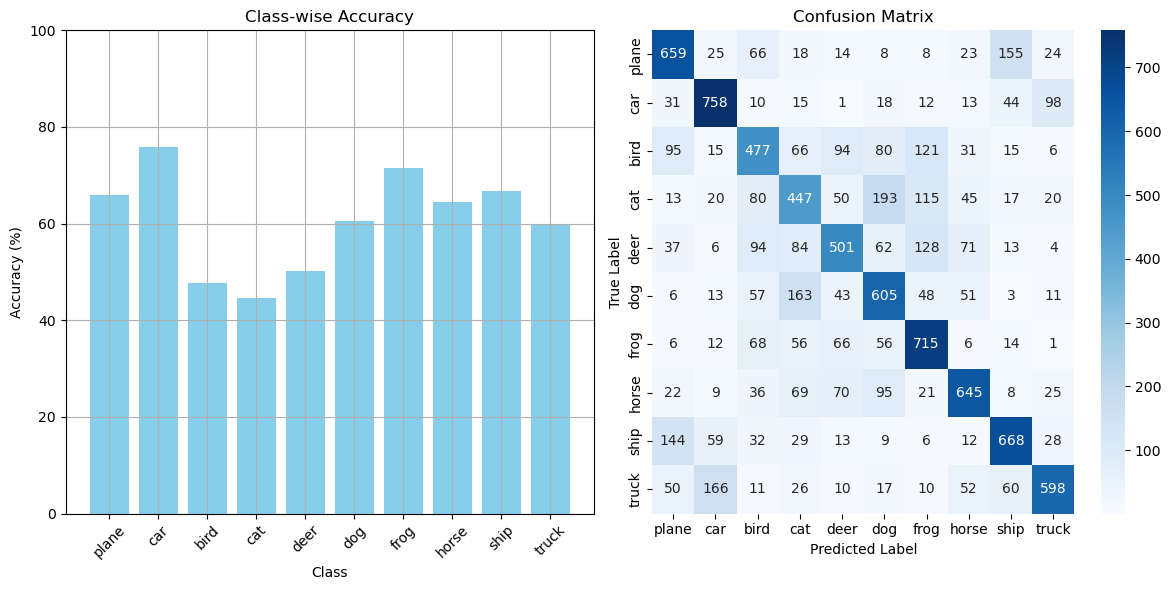

In [9]:
# Unfreeze layer4 parameters
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    net.fc
)
for param in net.layer2.parameters():
    param.requires_grad = True

# Unfreeze fc layer parameters
net.fc.requires_grad = True

# Setting different learning rates
layer2_params = {'params': net.layer2.parameters(), 'lr': 0.0001}
fc_params = {'params': net.fc.parameters(), 'lr': 0.01}

# Assuming you are using an Adam optimizer
optimizer = torch.optim.SGD([layer2_params, fc_params], momentum=0.9, weight_decay=1e-04)


net.to(device)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC&L2 with different optimizers'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net,testloader,classes)

Epoch 1/15
Accuracy of the network on the test images: 41.64%
Average Test Loss: 1.6239
Train Loss: 1.7895, Test Loss: 1.6239, Accuracy: 41.64%, Time: 20.48s
Epoch 2/15
Accuracy of the network on the test images: 47.98%
Average Test Loss: 1.4916
Train Loss: 1.5816, Test Loss: 1.4916, Accuracy: 47.98%, Time: 19.31s
Epoch 3/15
Accuracy of the network on the test images: 50.99%
Average Test Loss: 1.4003
Train Loss: 1.4888, Test Loss: 1.4003, Accuracy: 50.99%, Time: 19.38s
Epoch 4/15
Accuracy of the network on the test images: 51.48%
Average Test Loss: 1.4090
Train Loss: 1.4303, Test Loss: 1.4090, Accuracy: 51.48%, Time: 19.20s
Epoch 5/15
Accuracy of the network on the test images: 54.08%
Average Test Loss: 1.3359
Train Loss: 1.3811, Test Loss: 1.3359, Accuracy: 54.08%, Time: 19.31s
Epoch 6/15
Accuracy of the network on the test images: 54.72%
Average Test Loss: 1.3030
Train Loss: 1.3492, Test Loss: 1.3030, Accuracy: 54.72%, Time: 19.28s
Epoch 7/15
Accuracy of the network on the test image

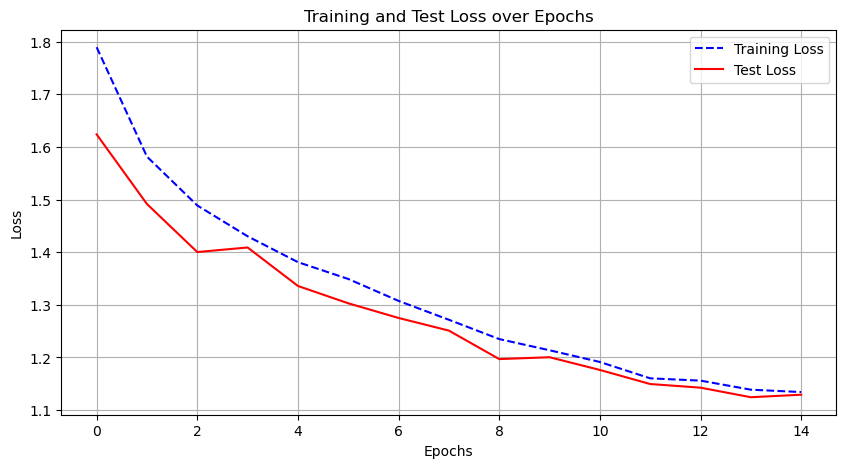

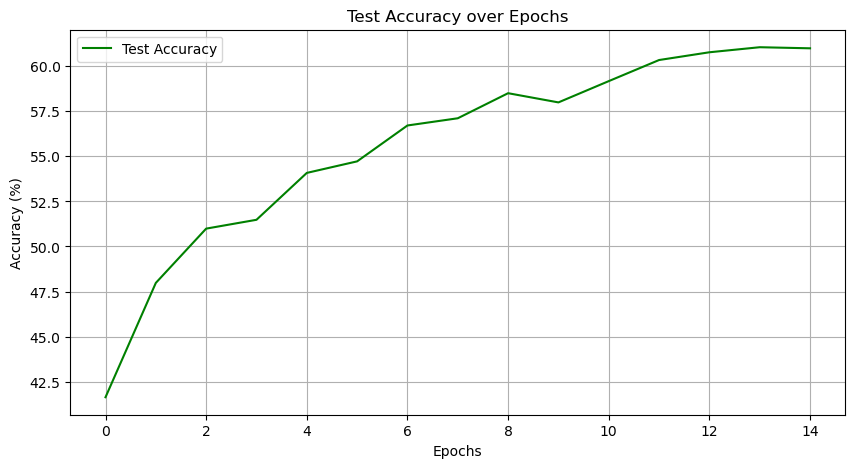

Plots saved as 'plot_assignment2\Resnet18 Fine Tune FC&L2 with different optimizers_loss.png' and 'plot_assignment2\Resnet18 Fine Tune FC&L2 with different optimizers_accuracy.png'.

Training Complete!
Total Training Time: 291.89 seconds
Minimum Training Loss: 1.1343
Minimum Test Loss: 1.1245
Highest Test Accuracy: 61.05%
Accuracy for class: plane is 66.6 %
Accuracy for class: car   is 77.0 %
Accuracy for class: bird  is 44.5 %
Accuracy for class: cat   is 49.6 %
Accuracy for class: deer  is 56.1 %
Accuracy for class: dog   is 54.9 %
Accuracy for class: frog  is 69.7 %
Accuracy for class: horse is 61.2 %
Accuracy for class: ship  is 72.9 %
Accuracy for class: truck is 65.1 %


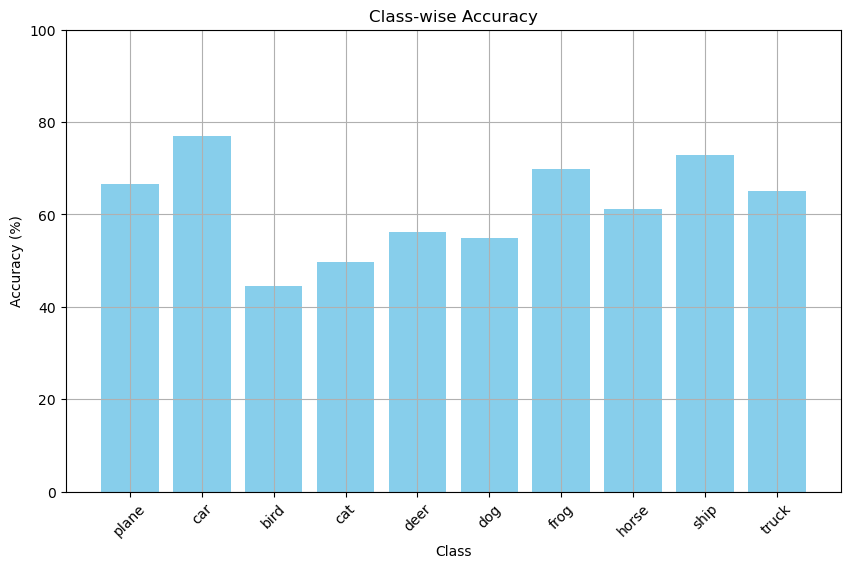

Accuracy for class: plane is 66.6 %
Accuracy for class: car   is 77.0 %
Accuracy for class: bird  is 44.5 %
Accuracy for class: cat   is 49.6 %
Accuracy for class: deer  is 56.1 %
Accuracy for class: dog   is 54.9 %
Accuracy for class: frog  is 69.7 %
Accuracy for class: horse is 61.2 %
Accuracy for class: ship  is 72.9 %
Accuracy for class: truck is 65.1 %


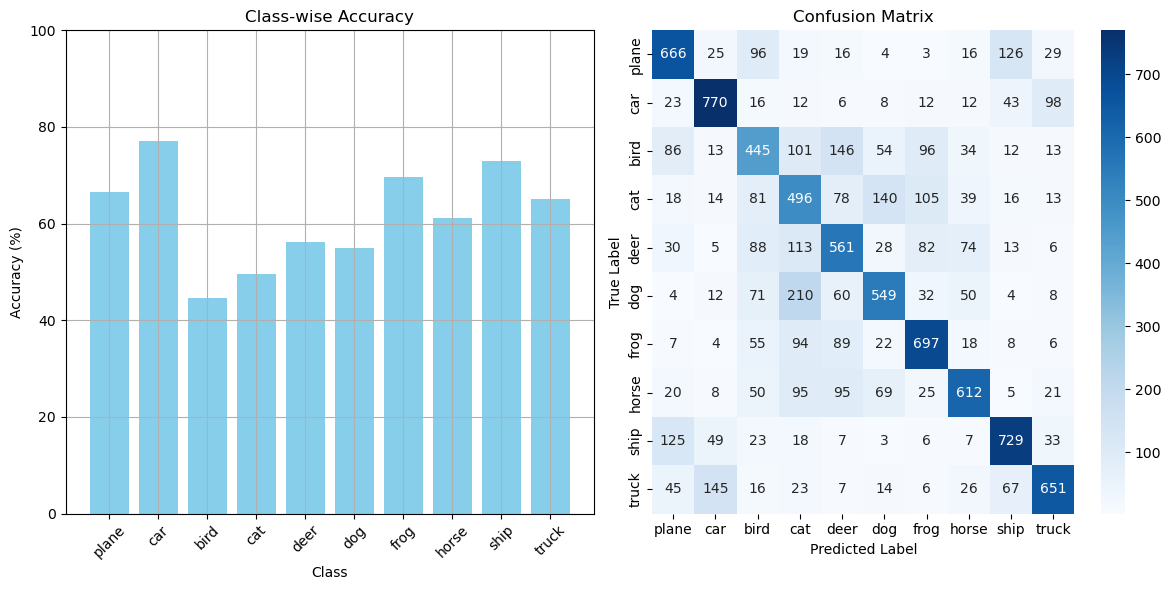

In [10]:
# Unfreeze layer4 parameters
net = models.resnet18(weights='IMAGENET1K_V1')
fc1 = nn.Linear(512, 128)

# Modify the existing fully connected layer (fc)
net.fc = nn.Linear(128, 10)

# Replace the model's classifier with a new sequential layer
# that includes the new fc1 and the modified fc
net.fc = nn.Sequential(
    fc1,
    nn.LeakyReLU(),   # Optional: Add an activation function like ReLU
    net.fc
)

for param in net.parameters():
    param.requires_grad = False
for param in net.fc.parameters():
    param.requires_grad = True
for param in net.layer1.parameters():
    param.requires_grad = True
# Unfreeze fc layer parameters

# Setting different learning rates
layer1_params = {'params': net.layer1.parameters(), 'lr': 0.0001}
fc_params = {'params': net.fc.parameters(), 'lr': 0.01}

# Assuming you are using an Adam optimizer
optimizer = torch.optim.Adam([layer1_params, fc_params], weight_decay=1e-04)


net.to(device)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 Fine Tune FC&L2 with different optimizers'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net,testloader,classes)

# Fully COnvolutional

Epoch 1/15
Accuracy of the network on the test images: 54.20%
Average Test Loss: 1.3060
Train Loss: 1.4566, Test Loss: 1.3060, Accuracy: 54.20%, Time: 36.34s
Epoch 2/15
Accuracy of the network on the test images: 66.88%
Average Test Loss: 0.9497
Train Loss: 0.9717, Test Loss: 0.9497, Accuracy: 66.88%, Time: 36.58s
Epoch 3/15
Accuracy of the network on the test images: 73.77%
Average Test Loss: 0.7653
Train Loss: 0.7540, Test Loss: 0.7653, Accuracy: 73.77%, Time: 36.60s
Epoch 4/15
Accuracy of the network on the test images: 77.51%
Average Test Loss: 0.6458
Train Loss: 0.6191, Test Loss: 0.6458, Accuracy: 77.51%, Time: 36.77s
Epoch 5/15
Accuracy of the network on the test images: 79.22%
Average Test Loss: 0.6036
Train Loss: 0.5345, Test Loss: 0.6036, Accuracy: 79.22%, Time: 37.00s
Epoch 6/15
Accuracy of the network on the test images: 82.21%
Average Test Loss: 0.5281
Train Loss: 0.4710, Test Loss: 0.5281, Accuracy: 82.21%, Time: 36.78s
Epoch 7/15
Accuracy of the network on the test image

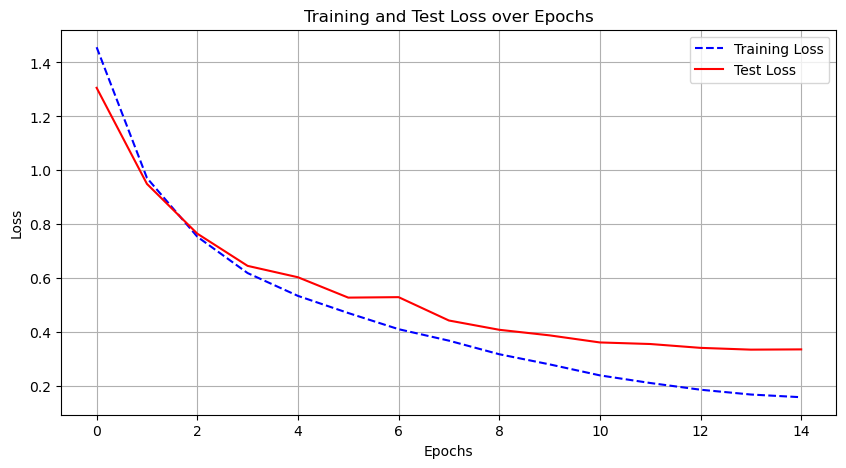

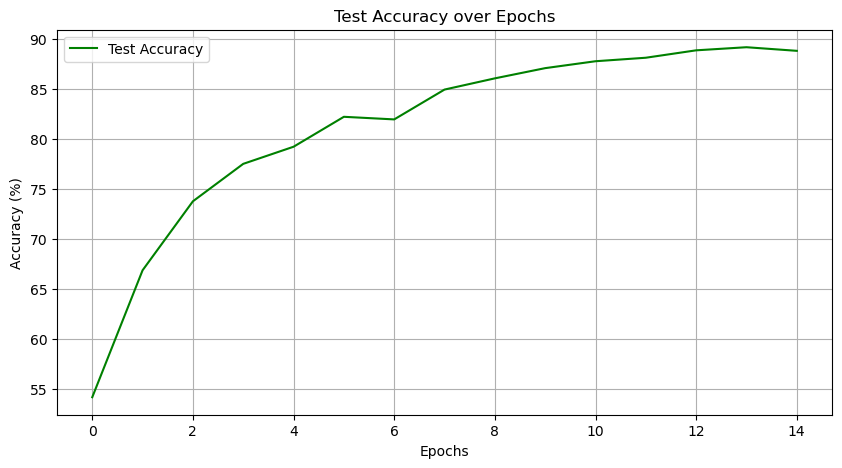

Plots saved as 'plot_assignment2\Resnet18 enhanched_loss.png' and 'plot_assignment2\Resnet18 enhanched_accuracy.png'.

Training Complete!
Total Training Time: 552.19 seconds
Minimum Training Loss: 0.1587
Minimum Test Loss: 0.3352
Highest Test Accuracy: 89.16%
Accuracy for class: plane is 91.8 %
Accuracy for class: car   is 95.2 %
Accuracy for class: bird  is 86.4 %
Accuracy for class: cat   is 75.7 %
Accuracy for class: deer  is 90.6 %
Accuracy for class: dog   is 83.4 %
Accuracy for class: frog  is 91.2 %
Accuracy for class: horse is 92.1 %
Accuracy for class: ship  is 94.0 %
Accuracy for class: truck is 93.0 %


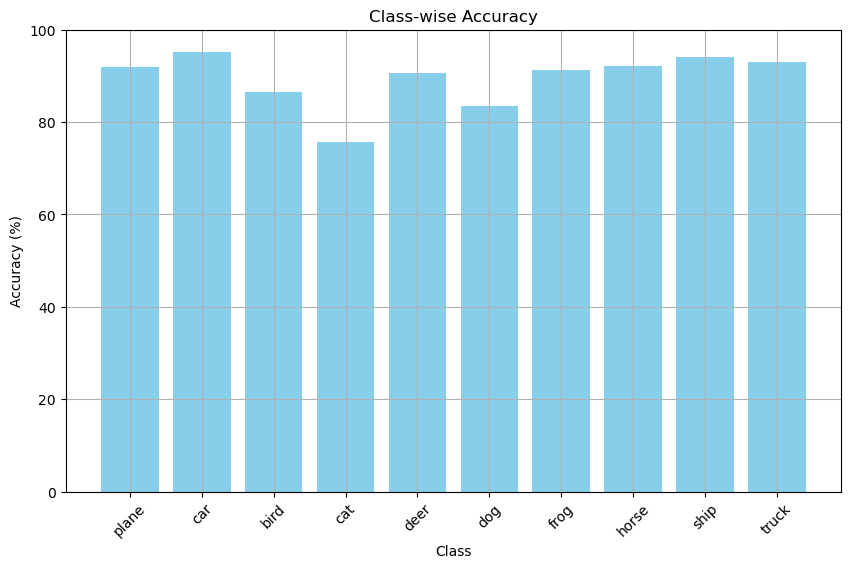

Accuracy for class: plane is 91.8 %
Accuracy for class: car   is 95.2 %
Accuracy for class: bird  is 86.4 %
Accuracy for class: cat   is 75.7 %
Accuracy for class: deer  is 90.6 %
Accuracy for class: dog   is 83.4 %
Accuracy for class: frog  is 91.2 %
Accuracy for class: horse is 92.1 %
Accuracy for class: ship  is 94.0 %
Accuracy for class: truck is 93.0 %


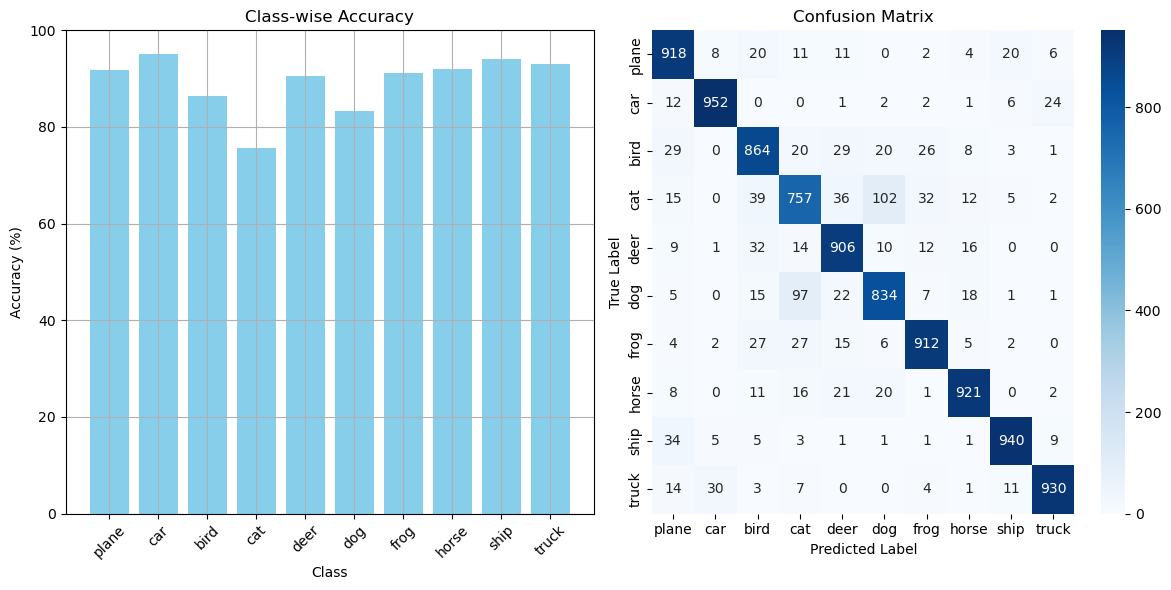

In [11]:
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_len, out_len, stride=1):
        super(ResidualBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_len, out_len, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_len)
        self.conv2 = nn.Conv2d(out_len, out_len, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_len)
        
        layers = []
        if stride != 1 or in_len != out_len:
            layers.append(nn.Conv2d(in_len, out_len, kernel_size=1, stride=stride, bias=False))
            layers.append(nn.BatchNorm2d(out_len))
            self.shortcut = nn.Sequential(*layers)

        else:
            self.shortcut = nn.Sequential()
        

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.bn2(out)
        out = self.conv2(out)
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    
    
class ResNet18(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
                
        self.layer1 = nn.Sequential(
            ResidualBlock(64, 64, stride=1),
            ResidualBlock(64, 64, stride=1)
        )
        self.layer2 = nn.Sequential(
            ResidualBlock(64, 128, stride=2),
            ResidualBlock(128, 128, stride=1)
        )
        self.layer3 = nn.Sequential(
            ResidualBlock(128, 256, stride=2),
            ResidualBlock(256, 256, stride=1)
        )
        
        self.layer4 = nn.Sequential(
            ResidualBlock(256, 512, stride=2),
            ResidualBlock(512, 512, stride=1)
        )
        
        self.linear = nn.Linear(512, 10)

    def create_block(self, out_len, stride):
        layers = []
        layers.append(ResidualBlock(self.in_len, out_len, stride=stride))
        self.in_len = out_len
        layers.append(ResidualBlock(self.in_len, out_len, stride=1))
        return nn.Sequential(*layers)
    
    def get_feature_space(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        return out
    
    def forward(self, x):
        out = self.get_feature_space(x)
        out = self.linear(out)
        return out
    

# Example usage:
net = ResNet18(num_classes=10)

for param in net.parameters():
    param.requires_grad = True
net.to(device)

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.000125)
criterion = nn.CrossEntropyLoss()
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)


scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
title = 'Resnet18 enhanched'
criterion = nn.CrossEntropyLoss()
plot_training(net, trainloader, valloader, epochs, optimizer, criterion, scheduler, title)
plot_class_accuracy(net, testloader,classes)
plot_class_accuracy_with_confusion_matrix(net,testloader,classes)

## Exercise 1

How many layers it is better to fine-tune?

It is better to update all the weights of the model?

## Exercise 2

Try to change the hyper-parameters of the fine-tuning (e.g. lr of CNN layers and lr of the fc layers) and/or network architecture

## Exercise 3

Try to implement the model selection strategy (also known as early stopping) based on the validation accuracy on cifar10.

Consider using the two following command to respectively save and load the state of all the parameters of the model in a moment.

In [51]:
# save all the parameters of the model
model_state_dict = net.state_dict()

# load saved weights on the model
net.load_state_dict(model_state_dict)


<All keys matched successfully>